### Poin-poin Assignment
1. Gunakan dataset berikut : AirPassengersDataset, AusBeerDataset, GasRateCO2Dataset, HeartRateDataset, IceCreamHeaterDataset, MonthlyMilkDataset, SunspotsDataset (pilih 1 dataset saja) sisanya bisa untuk latihan.

3. Drive files assignment : https://drive.google.com/drive/folders/1DM1pacr7da-0kg8fCyiNq9so8xVI0vJ5?usp=sharing

In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.6/817.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

from darts.metrics import mape, mase, mae, mse, ope, r2_score, rmse, rmsle
from darts.utils.statistics import check_seasonality, plot_acf, plot_pacf, plot_residuals_analysis
from darts.dataprocessing.transformers.boxcox import BoxCox

#Dataset timeseries
from darts.datasets import AirPassengersDataset, AusBeerDataset, GasRateCO2Dataset
from darts.datasets import HeartRateDataset, IceCreamHeaterDataset, MonthlyMilkDataset
from darts.datasets import SunspotsDataset

#tambahkan library yang dibutuhkan

In [ ]:
# Pilih dataset yang digunakan (salah satu saja, sisanya bisa untuk latihan)

ts = AirPassengersDataset().load()
# dataframe = nama_library_dataset().load()

### Assignment 1 Poin (10)
1. Pilih dataset diatas, serta analisa plot-plotnya
2. Lakukan pengecekan info pada dataset, pastikan tipe data sudah sesuai

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
ts.head()

<TimeSeries (DataArray) (Month: 5, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1949-05-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
df = ts.pd_dataframe()

In [ ]:
df.head()

component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


<Axes: title={'center': '#Passengers'}, xlabel='Month'>

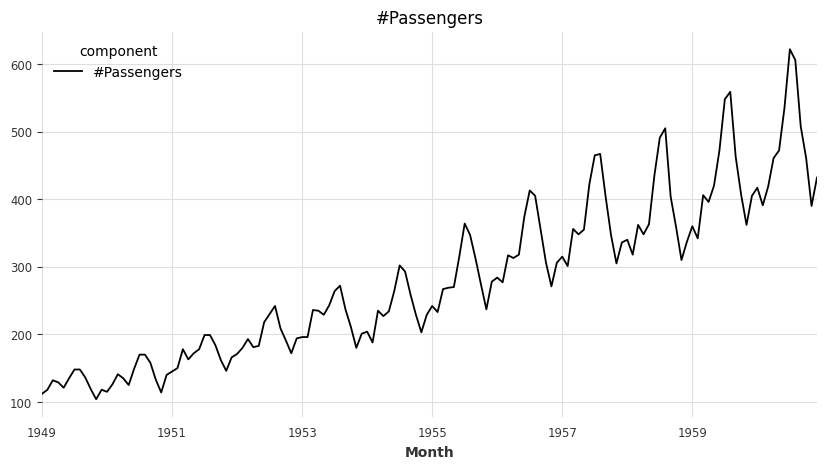

In [ ]:
df.plot(figsize=(10,5),title='#Passengers')

Dipilih dataset airpassenger, lalu dilakukan load datasetnya, terlihat bahwa dataset merupakan timeseries object, dilakukan pembagian menjadi timeseries object serta dataframe agar dapat dicek info dan lain lain dengan mudah, lalu dilakukan ploting pada kolom Passenger.

### Assignment 2 (poin 10):
1. Analisis Seasonality, Trend pada plotting time series, lakukan interpretasi dari dataset yang anda gunakan

In [ ]:
#Tambahkan cell jika dibutuhkan

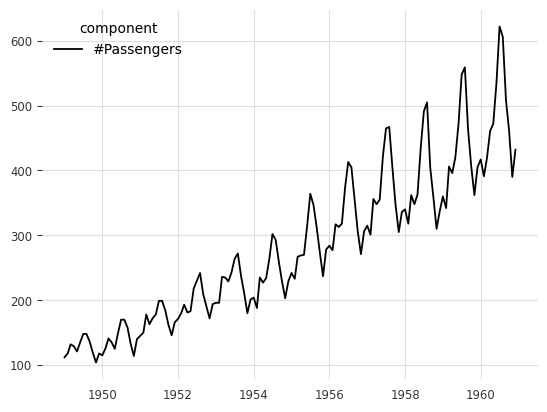

In [ ]:
dates = df.index.date
df_dates = pd.DataFrame(df.values, index=dates, columns=df.columns)

df_dates.plot()
plt.show()

<Axes: xlabel='Month'>

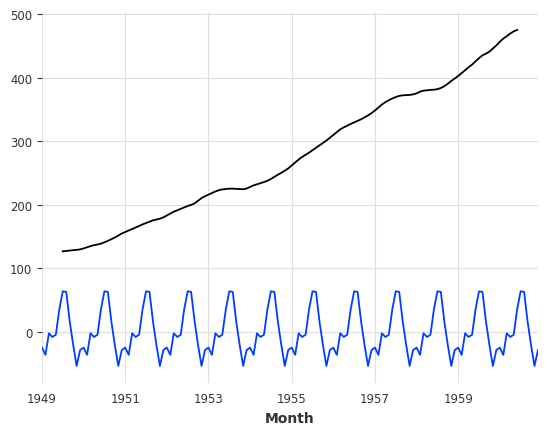

In [ ]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df['#Passengers'])

res.trend.plot()

res.seasonal.plot()

Pada plot trend dan seasonality yang sudah dilakukan, terlihat bahwa dari dataset tersebut memiliki trend yang positif atau meningkat, lalu terdapat pola naik turun pada seasonalitynya tetapi secara umum stabil atau mendatar, yang berarti bahwa ada fluktuasi atau variasi periodik dalam dataset, namun variasi tersebut tidak menunjukkan peningkatan atau penurunan jangka panjang.

### Assignment 3. (Poin 40):
1. Cek apakah additive atau multiplikatif serta lakukan test timeseries stationary memakai ADF pada data yang digunakan
2. Serta berikan kesimpulan dari hasil test stationary


In [ ]:
#Tambahkan cell jika dibutuhkan

Multiplicative Decomposition


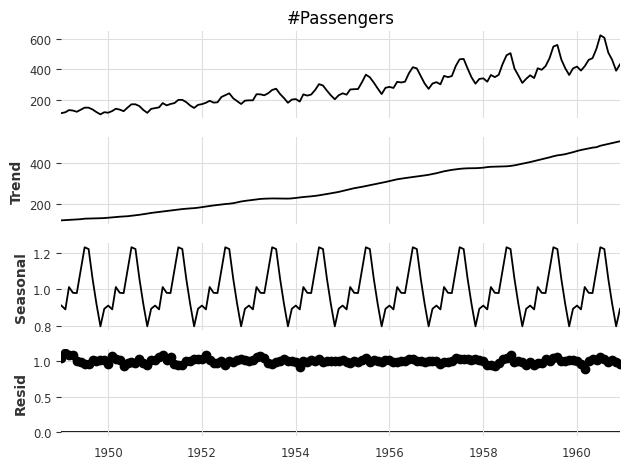

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['#Passengers'], model='multiplicative', extrapolate_trend='freq')

print('Multiplicative Decomposition')
result_mul.plot()
plt.show()

Additive Decomposition


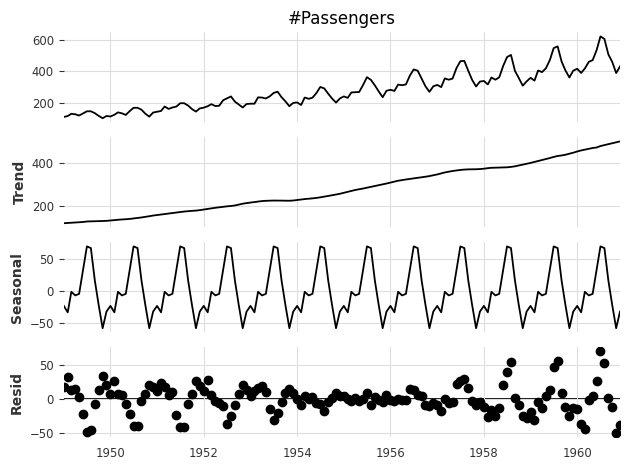

In [ ]:
result_add = seasonal_decompose(df['#Passengers'], model='additive', extrapolate_trend='freq')

print('Additive Decomposition')
result_add.plot()
plt.show()

Berdasarkan plot, terlihat perbedaan pada residual di multipikatif dan aditif dimana pada multi ia memiliki pola yang stabil mendatar dan tidak random, sebaliknya pada aditif dia random dan tidak stabil, menunjukkan bahwa model multiplikatif lebih sesuai.

In [ ]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Month,,,,
1949-01-01,0.911256,118.588481,1.036418,112.0
1949-02-01,0.890342,119.734169,1.106896,118.0
1949-03-01,1.012397,120.879856,1.078621,132.0
1949-04-01,0.980719,122.025544,1.077940,129.0
1949-05-01,0.979495,123.171232,1.002938,121.0


In [ ]:
df_reconstructed['check_actual'] = df_reconstructed['seas'] * df_reconstructed['trend'] * df_reconstructed['resid']

In [ ]:
df_reconstructed

,seas,trend,resid,actual_values,check_actual
Month,,,,,
1949-01-01,0.911256,118.588481,1.036418,112.0,112.0
1949-02-01,0.890342,119.734169,1.106896,118.0,118.0
1949-03-01,1.012397,120.879856,1.078621,132.0,132.0
1949-04-01,0.980719,122.025544,1.077940,129.0,129.0
1949-05-01,0.979495,123.171232,1.002938,121.0,121.0
...,...,...,...,...,...
1960-08-01,1.219640,486.355575,1.021614,606.0,606.0
1960-09-01,1.056262,490.716443,0.980080,508.0,508.0
1960-10-01,0.920694,495.077312,1.011376,461.0,461.0


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_reconstructed['actual_values'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


Berdasarkan tes stasionari dengan adf didapat hasil p value yaitu 0.991, yang mana ini jauh lebih besar dari tingkat signifikansi umum 0.05. Oleh karena itu, tidak didapatkan cukup bukti untuk menolak hipotesis nol. Dengan kata lain, berdasarkan tes ADF, seri waktu adalah non-stasioner.

In [ ]:
result = adfuller(df_reconstructed['resid'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -7.590190972177366
p-value: 2.5434864627631112e-11


In [ ]:
result = adfuller(result_add.resid, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.382139068715299
p-value: 3.6924084703958753e-06


Dilakukan tes adf dengan menggunakan data yang berbeda, yang pertama adalah menggunakan residual dari model yang telah direkonstruksi, dengan tujuan untuk menentukan apakah variasi yang tersisa menghilangkan komponen trend dan seasonality dari data asli adalah stasioner, lalu pada tes kedua dengan residual dari model aditif,dengan tujuan menentukan apakah variasi yang tersisa setelah menghilangkan komponen trend dan seasonality dari model aditif adalah stasioner.

Didapatkan hasil yang stasioner dimana nilai p value kedua test jauh lebih kecil dari 0.05 yang berarti didapat cukup bukti untuk menolak H0 bahwa time series non stasioner.


### Assignment 4. (Poin 40) :
1. Bandingkan ketiga model : Auto Arima, Naive seasonal & Naive Drift, Prophet serta lakukan evaluasi model memakai R2 atau RMSE.

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
import time
from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
)d

In [ ]:
def evaluate(actual_test, prediction):
    print(f'RMSE: {rmse(actual_test, prediction)}')
    print(f'R2: {r2_score(actual_test, prediction)}')
    print(f'MAPE: {mape(actual_test, prediction)}')

In [ ]:
ts

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='Month'>

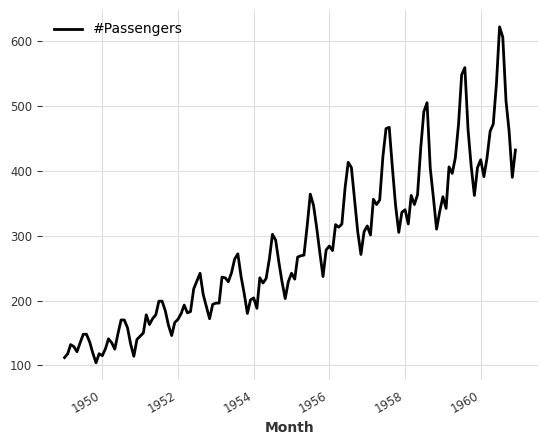

In [ ]:
ts.plot()

<Axes: xlabel='Month'>

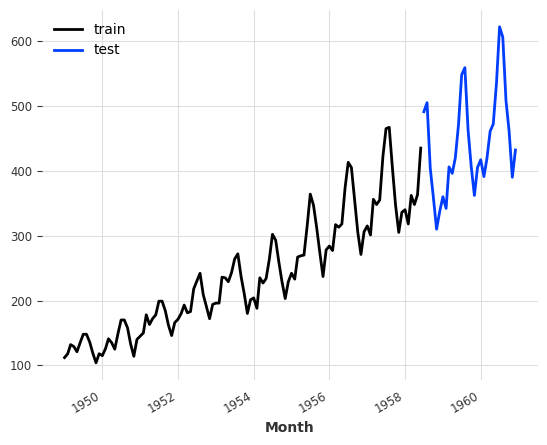

In [ ]:
ts_train, ts_test = ts.split_before(0.80)
ts_train.plot(label = 'train')
ts_test.plot(label = 'test')

In [ ]:
ts_test

<TimeSeries (DataArray) (Month: 30, component: 1, sample: 1)>
array([[[491.]],

       [[505.]],

       [[404.]],

       [[359.]],

       [[310.]],

       [[337.]],

       [[360.]],

       [[342.]],

       [[406.]],

       [[396.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1958-07-01 1958-08-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
series = ts

#### Naive Seasonal

RMSE: 76.58285273697588
R2: 0.019864745925108895
MAPE: 14.043967381244526
Fitting the time series model takes 0.0006804466247558594 seconds.


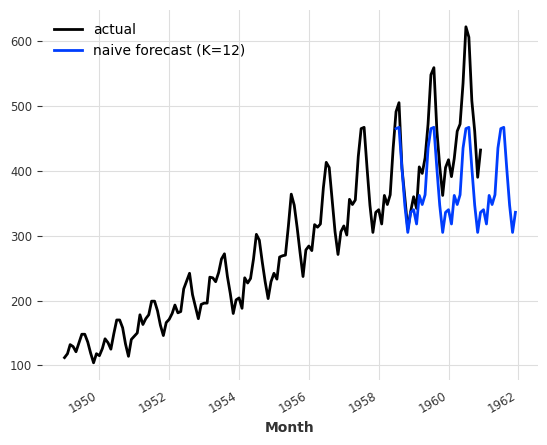

In [ ]:
seasonal_model = NaiveSeasonal(K=12)
start = time.time() #mulai
seasonal_model.fit(ts_train) #fitting naive seasonal
end = time.time() #selesai
seasonal_forecast = seasonal_model.predict(42)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=12)")
evaluate(ts_test, seasonal_forecast)

print('Fitting the time series model takes', end-start, 'seconds.')

<Axes: xlabel='Month'>

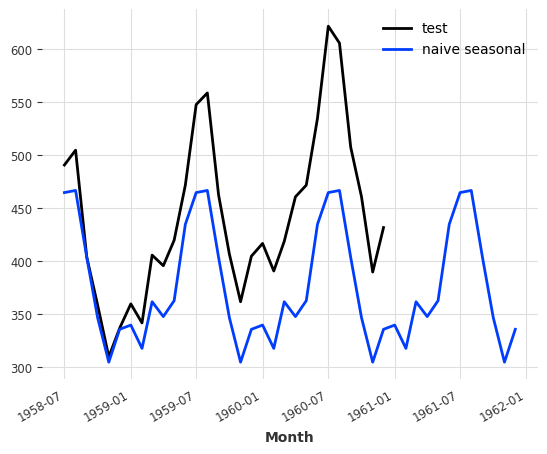

In [ ]:
ts_test.plot(label = 'test')
seasonal_forecast.plot(label = 'naive seasonal')

#### Naive Drift


RMSE: 30.899586048869487
R2: 0.840438447476271
MAPE: 4.832692851918194
Fitting the time series model takes 0.0006644725799560547 seconds.


<Axes: xlabel='Month'>

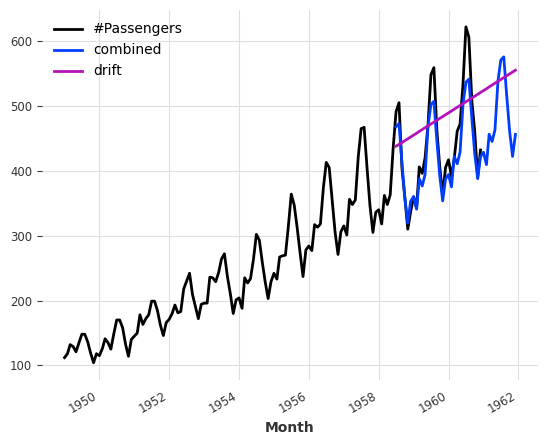

In [ ]:
drift_model = NaiveDrift()
start = time.time()
drift_model.fit(ts_train) #fitting naive drift
end = time.time()
drift_forecast = drift_model.predict(42)

combined_forecast = drift_forecast + seasonal_forecast - ts_train.last_value()
evaluate(ts_test, combined_forecast)

print('Fitting the time series model takes', end - start, 'seconds.')
series.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

#### Auto Arima

RMSE: 93.28497894094369
R2: -0.4542744236124714
MAPE: 13.981802038672445
Fitting the time series model takes 7.663760423660278 seconds.


<Axes: xlabel='Month'>

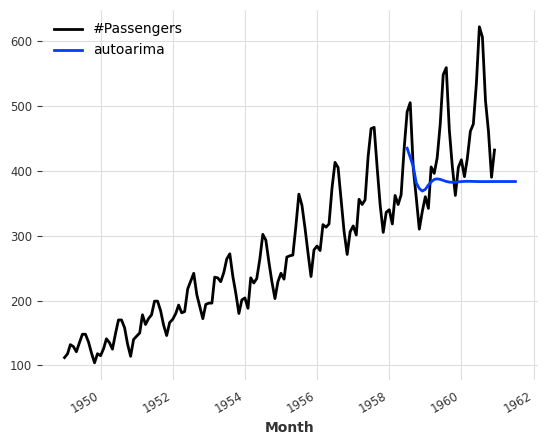

In [ ]:
autoarima = AutoARIMA()
start = time.time()
autoarima.fit(ts_train)
end = time.time()
autoarima_forecast = autoarima.predict(37)

evaluate(ts_test, autoarima_forecast)

print('Fitting the time series model takes', end - start, 'seconds.')
series.plot()
autoarima_forecast.plot(label = 'autoarima')

In [ ]:
import pmdarima as pmd
import statsmodels.api as sm
from scipy.stats import normaltest

def arima_diff(timeseries, alpha):
    n_kpss = pmd.arima.ndiffs(timeseries.pd_dataframe(), alpha = alpha, test = 'kpss', max_d = 2)
    n_adf = pmd.arima.ndiffs(timeseries.pd_dataframe(), alpha = alpha, test = 'adf', max_d = 2)
    return max(n_adf, n_kpss)

In [ ]:
n_diff = arima_diff(ts_train, alpha = 0.05)
print(n_diff)

1


<Axes: xlabel='Month'>

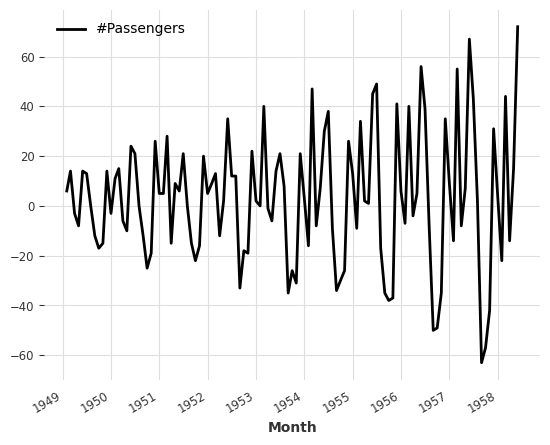

In [ ]:
ts_train.diff(n = 1).plot()

In [ ]:
n_diff

1

#### Auto Arima Diff

In [ ]:
new_autoarima = AutoARIMA(d=1, # berapa kali nge-differencing biar jadi seasonal
                          max_d=1,
                          D=1, # periode differencing harus berapa periode seasonality
                          m=12, # seasonality
                          seasonal=True, # kita kasi tau kalo time series kita seasonal
                          max_order=10, # semakin tinggi angka ini, maka semakin banyak parameter pula yang dicari
                          stationary=True, # kita kasi tau kalo time series kita nggak stationary
                          suppress_warnings=True, # biar pas dia fitting modelnya ga banyak keluar output
                          error_action = 'trace', trace = True, information_criterion="bic")

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=901.483, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=1354.450, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=inf, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=1590.401, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : BIC=inf, Time=0.85 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : BIC=inf, Time=0.81 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : BIC=inf, Time=3.32 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : BIC=inf, Time=7.02 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : BIC=1079.380, Time=0.71 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : BIC=inf, Time=3.55 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : BIC=901.325, Time=2.34 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : BIC=897.928, Time=3.63 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : BIC=894.398, Time=1.13 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : BIC=1077.309, Time=

<Axes: xlabel='Month'>

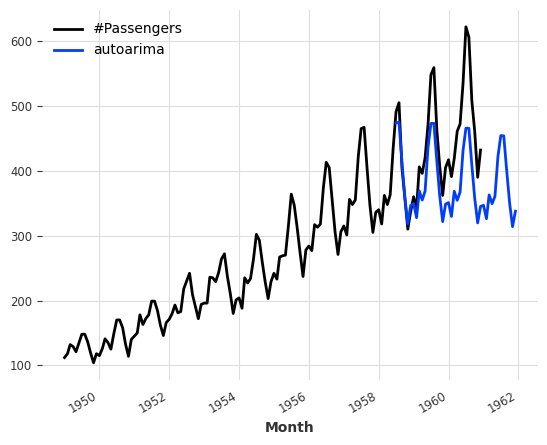

In [ ]:
start = time.time()
new_autoarima.fit(ts_train) #fitting model auto arima
end = time.time()

new_autoarima_forecast = new_autoarima.predict(42)
evaluate(ts_test, new_autoarima_forecast)


print('Fitting the time series model takes', end - start, 'seconds.')
series.plot()
new_autoarima_forecast.plot(label = 'autoarima')

Fitting the time series model takes 51.25698661804199 seconds.


<Axes: xlabel='Month'>

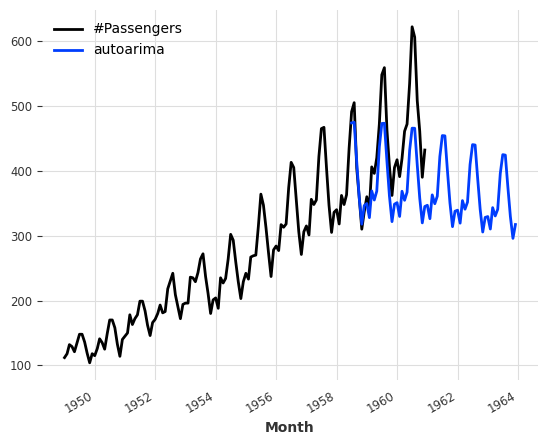

In [ ]:
new_autoarima_forecast = new_autoarima.predict(66) #prediksi 2 tahun : 42 + 24 (2 tahun)

print('Fitting the time series model takes', end - start, 'seconds.')
series.plot()
new_autoarima_forecast.plot(label = 'autoarima')

#### Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1l1r3h7l/v0d3wqdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1l1r3h7l/i4z0rzdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1393', 'data', 'file=/tmp/tmp1l1r3h7l/v0d3wqdh.json', 'init=/tmp/tmp1l1r3h7l/i4z0rzdz.json', 'output', 'file=/tmp/tmp1l1r3h7l/prophet_modelsz3xbhn3/prophet_model-20231214124916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 41.910005235356266
R2: 0.7064660351569922
MAPE: 7.604604999927876
Fitting the time series model takes 0.1915881633758545 seconds.


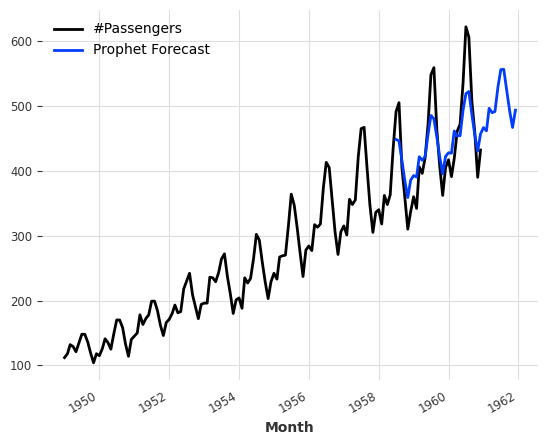

In [ ]:
prop = Prophet()
start = time.time()
prop.fit(ts_train) #fit modelling using prophet
end = time.time()
prop_forecast = prop.predict(42)

series.plot()
prop_forecast.plot(label = 'Prophet Forecast')

evaluate(ts_test, prop_forecast)

print('Fitting the time series model takes', end - start, 'seconds.')

RMSE: 41.910005235356266
R2: 0.7064660351569922
MAPE: 7.604604999927876
Fitting the time series model takes 0.1915881633758545 seconds.


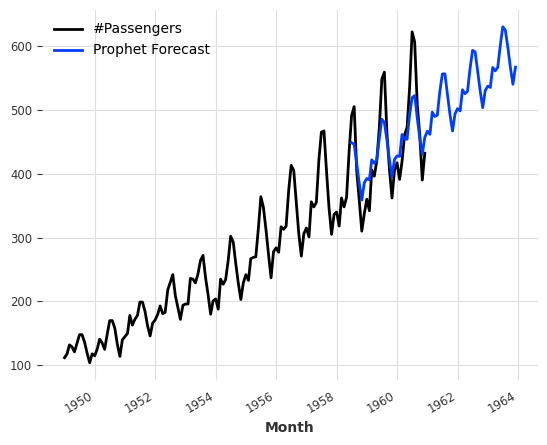

In [ ]:
prop_forecast = prop.predict(66) #prediksi 2 tahun : 42 + 24 (2 tahun)

series.plot()
prop_forecast.plot(label = 'Prophet Forecast')

evaluate(ts_test, prop_forecast)

print('Fitting the time series model takes', end - start, 'seconds.')

Kesimpulan dari perbandingan adalah:
1. Naive Seasonal
dengan nilai RMSE: 76.58285273697588, R2: 0.019864745925108895, MAPE: 14.043967381244526, serta waktu yang dibutuhkan 0.0006804466247558594 detik. yang mana ini memiliki RMSE dan MAPE yang cukup tinggi, dan nilai R2 yang sangat rendah, menunjukkan bahwa model ini tidak melakukan pekerjaan yang baik dalam memprediksi data.
2. Naive Drift
RMSE: 30.899586048869487, R2: 0.840438447476271, MAPE: 4.832692851918194, waktu: 0.0006644725799560547 detik. Model ini memiliki RMSE dan MAPE yang lebih rendah, dan nilai R2 yang sangat tinggi, menunjukkan bahwa model ini melakukan pekerjaan yang baik dalam memprediksi data
3. Auto Arima
RMSE: 93.28497894094369, R2: -0.4542744236124714, MAPE: 13.981802038672445
waktu: 7.663760423660278 detik. Model ini memiliki RMSE dan MAPE yang paling tinggi, dan nilai R2 yang negatif, menunjukkan bahwa model ini mungkin tidak sesuai untuk data yang digunakan.
4. Auto Arima setelah di differencing
RMSE: 71.15039347907553, R2: 0.15398601353199082, MAPE: 12.53849355448553
waktu: 51.25698661804199 detik. Meskipun model ini memiliki metrik yang lebih baik dibandingkan dengan Auto ARIMA sebelum differencing, metriknya masih lebih buruk dibandingkan dengan Naive Drift dan Prophet.
5. Prophet
RMSE: 41.910005235356266, R2: 0.7064660351569922, MAPE: 7.604604999927876
Waktu: 0.1915881633758545 detik. Model ini memiliki RMSE dan MAPE yang relatif rendah, dan nilai R2 yang cukup tinggi, menunjukkan bahwa model ini melakukan pekerjaan yang baik dalam memprediksi data.

Dengan hasil tersebut, dapat ditarik kesimpulan bahwa naive drift dan prophet memiliki hasil yang baik dibanding lainya, dengan naive drift sedikit unggul dari sisi kecepatannya.